In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('noaav4_nh_monthly_sic_1978_2024.nc')
ds

<xarray.Dataset> Size: 2GB
Dimensions:                                 (time: 545, tdim: 1, y: 448, x: 304)
Coordinates:
  * time                                    (time) datetime64[ns] 4kB 1978-11...
    xgrid                                   (x) float32 1kB ...
    ygrid                                   (y) float32 2kB ...
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc_monthly                 (time, tdim, y, x) float32 297MB ...
    melt_onset_day_cdr_seaice_conc_monthly  (time, tdim, y, x) float32 297MB ...
    nsidc_bt_seaice_conc_monthly            (time, tdim, y, x) float32 297MB ...
    nsidc_nt_seaice_conc_monthly            (time, tdim, y, x) float32 297MB ...
    projection                              (time) |S1 545B ...
    qa_of_cdr_seaice_conc_monthly           (time, tdim, y, x) float32 297MB ...
    stdev_of_cdr_seaice_conc_monthly        (time, tdim, y, x) float32 297MB ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc_monthly
    metadata_link:             https://nsidc.org/data/g02202/versions/4/
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-22T16:08:07Z
    time_coverage_start:       1987-04-01T00:00:00Z
    time_coverage_end:         1987-04-30T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...

In [5]:
# Get variables
time = ds.time.values
xgrid = ds.xgrid.values
ygrid = ds.ygrid.values

# Get data
sic = ds.cdr_seaice_conc_monthly.values
sic_reshaped = sic.reshape((sic.shape[0], sic.shape[2], sic.shape[3]))
sic_reshaped.shape


(545, 448, 304)

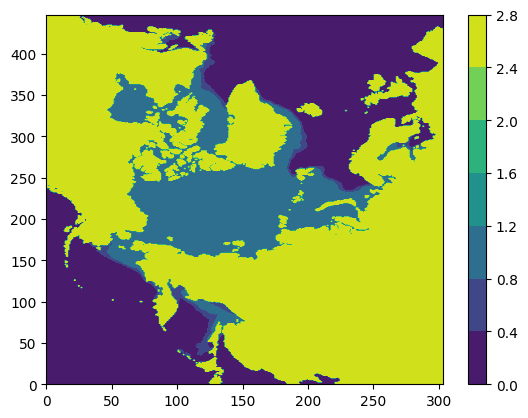

In [6]:
plt.figure
plt.contourf(sic_reshaped[0])
plt.colorbar()
plt.show()